# Worksheet 1

### This notebook contains the first set of exercises for the Open Quantum Systems course. By completing these exercises, you will learn methods to predict the dynamics of open quantum systems while also getting experience of programming in Python. Each of the 8 questions below is worth 10 marks. When completing the numerical exercises, please remember the following guidelines:
### - *Comment* your code to explain what each part does. I cannot award marks if I do not understand what you are trying to do. Conversely, you will gain marks for well-commented code even if it does not solve the problem.
### - Define variables and functions to make your code more readable and adaptable. This is especially useful when repeating the same calculation with different parameters.
### - Don't be afraid to look online for help! The [documentation](https://docs.python.org/3/#) is a good place to start but you can find many other useful sources with your favourite search engine.

---

1. In the first lecture we considered the general qubit Hamiltonian
$$\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$$
for some unit vector $\mathbf{u}= (u_x,u_y,u_z)$. In this exercise we will find a general analytical expression for the time evolution operator $ \hat{U}(t) = {\rm e}^{-{\rm i}\hat{H}t/\hbar}$.

    (a) Let's warm up with the simplest case where $\mathbf{u} = (0,0,1)$. First show that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ is equal to the identity operator. Now use this fact and the definition of the matrix exponential (i.e. its Taylor expansion) to show that
    
    $$ {\rm e}^{-{\rm i}\omega \hat{\sigma}_zt/2} = \cos(\omega t/2) \hat{1} - {\rm i}\sin(\omega t/2) \hat{\sigma}_z.$$
    
    [Hint: recall the Taylor expansions for $\cos(x) = \sum_{n=0}^\infty \frac{({\rm i} x)^{2n}}{(2n)!}$ and ${\rm i}\sin(x) = \sum_{n=0}^\infty \frac{({\rm i}x)^{2n+1}}{(2n+1)!}$]

    (b) The commutator between two operators $\hat{A}$ and $\hat{B}$ is defined by $[\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A}$. The anti-commutator is defined by $\{\hat{A},\hat{B}\} = \hat{A}\hat{B}+\hat{B}\hat{A}$. The commutator between any pair of Pauli matrices is given in the lecture notes. Explicitly verify the anti-commutation relation
    
    $$\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}},$$
    
    for any pair of indices $j,k = x,y,z$. Here, $\delta_{jk}$ is the Kronecker delta symbol, defined by $\delta_{jk} = 1$ if $j=k$ and $\delta_{jk} = 0$ otherwise. Using these 
    commutation and anti-commutation relations (or otherwise), verify the identity:
    
    $$ \hat{\sigma}_j\hat{\sigma}_k = \delta_{jk}  \hat{\mathbb{1}} + \sum_{l=x,y,z}{\rm i} \varepsilon_{jkl} \hat{\sigma}_l,$$  
    
    where $\varepsilon_{ijk}$ is the Levi-Civita symbol, which is anti-symmetric under any pairwise permutation of its indices, $\varepsilon_{jkl}= -\varepsilon_{kjl} = \varepsilon_{klj}\ldots $ etc., and takes the value $\varepsilon_{jkl} = 1$ for $(j,k,l) = (x,y,z)$. Note that the anti-symmetric property implies that $\varepsilon_{jkl}=0$ whenever two or more indices are equal.
    
    (c) Now consider a general $\mathbf{u}=(u_x,u_y,u_z)$, where all three components of $\mathbf{u}$ are non-zero. Using the identity from (b) and the fact that $\lVert\mathbf{u}\rVert = 1$, prove that
    
    $$ \hat{H}^2 = \left(\frac{\hbar\omega}{2}\right)^2\hat{\mathbb{1}}.$$
    
    Use this result to show that, in general,
    
    $$ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$$
    
    (d) Set $\mathbf{u} = (1,1,0)/\sqrt{2}$, and use the result of (c) to calculate the 
    calculate an analytical expression for the operator $\hat{\sigma}_z$ in the Heisenberg picture:
    
    $$ \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t). $$
    
    (e) Find the expectation value $\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$. Plot your analytical result as a function of the dimensionless time variable $\omega t$ using [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). (Remember to label your axes!) 

In [1]:
#step one is to import the relevant libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import numpy.linalg as l
import scipy
from scipy.linalg import expm , cosm, sinm
style.use('seaborn')


Text(0.5, 1.0, 'Plot 1.Expectation Value as a function of $\\omega$t')

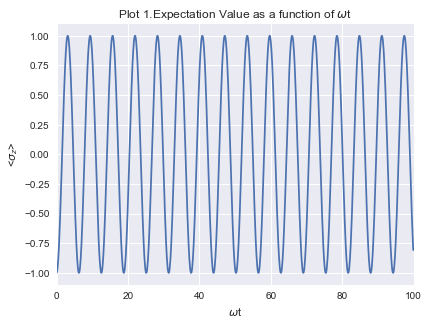

In [457]:
#defining my expectation value calculated by hand
def expectation(x):    
    return (-np.cos(x))
#initialise x  
x = np.arange(0,100,0.1)
#plot my analytical expectation value
plt.figure(figsize = (6.4,4.8))
plt.plot(x,expectation(x))
plt.xlim([0,100])
plt.xlabel('$\omega$t')
plt.ylabel('<$\sigma_z$>')
plt.grid(True)
plt.title('Plot 1.Expectation Value as a function of $\omega$t')

2. Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,1,0)/\sqrt{2}$. 
    
    (a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [458]:
#define my relevant constants
h_barw = 0.2

#define my pauli matrices i will need as numpy arrays
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,(0-1j)],[(0+1j),0]])
sigma_z = np.array([[1,0],[0,-1]])
#define my hamiltonian
hamiltonian = (h_barw/(2*np.sqrt(2)))*np.array(sigma_x+sigma_y)
print('Hamiltonian= ',type(hamiltonian),'\n',  hamiltonian,'\n')

#squaring my hamiltonian
print('Hamiltonian Squared = ' ,'\n', hamiltonian@hamiltonian)

Hamiltonian=  <class 'numpy.ndarray'> 
 [[0.        +0.j         0.07071068-0.07071068j]
 [0.07071068+0.07071068j 0.        +0.j        ]] 

Hamiltonian Squared =  
 [[0.01+0.j 0.  +0.j]
 [0.  +0.j 0.01+0.j]]


Here it is clear that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}} = 0.01\hat{\mathbb{1}}.$

(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$.

In [591]:
phi_0 = np.array([[0],[1]])

print(hamiltonian@phi_0)

[[0.07071068-0.07071068j]
 [0.        +0.j        ]]


This is not an eigenstate of the Hamiltonian because there is no coefficient that could return a down on the RHS. The true eigenstates are

In [592]:
#calculating the true eigenstates using numpy.linalg
print( 'Eigenstate 1 =',l.eig(hamiltonian)[1][0])
print('Eigenstate_2 =', l.eig(hamiltonian)[1][1])

Eigenstate 1 = [0.5       -0.5j 0.70710678+0.j ]
Eigenstate_2 = [ 0.70710678+0.j  -0.5       -0.5j]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).
Verify numerically that $\hat{U}(\Delta t)$ is unitary.

In [460]:
#here I will set hbar = 1 which makes w = 0.2
delta_t = 0.05

def U(HAM , delta_t):
    '''returns the time evolution operator over a small time step delta_t'''
    return(expm(-1j*HAM*(delta_t))) 

print('The time evolution Operator is equal to','\n', U(hamiltonian,delta_t),'\n')
print('Conjugate Transpose = ','\n', U(hamiltonian,delta_t).conj().T,'\n')
print('Inverse = ','\n', l.inv(U(hamiltonian,delta_t)),'\n')

The time evolution Operator is equal to 
 [[ 0.9999875 +0.j         -0.00353552-0.00353552j]
 [ 0.00353552-0.00353552j  0.9999875 +0.j        ]] 

Conjugate Transpose =  
 [[ 0.9999875 -0.j          0.00353552+0.00353552j]
 [-0.00353552+0.00353552j  0.9999875 -0.j        ]] 

Inverse =  
 [[ 0.9999875 +0.j          0.00353552+0.00353552j]
 [-0.00353552+0.00353552j  0.9999875 +0.j        ]] 



The inverse equals the hermitian conjugate hence this time evolution operator is unitary

(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. 

Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. 


The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. 


Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. 

Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Plot 2. $<\\hat{\\sigma}_z>$ as a function of dimensionless $\\omega t$ ')

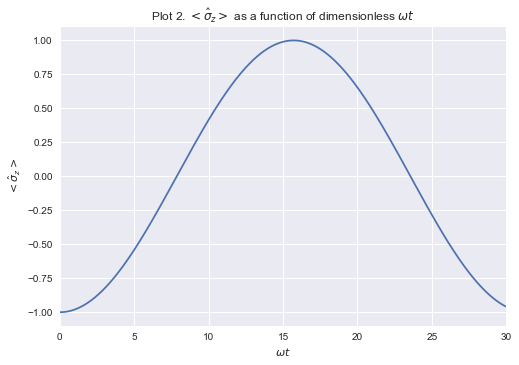

In [461]:
delta_t = 0.05 #time steps
wt_final = 30 #final time : wt = 30
wt = np.arange(0,wt_final,0.05)
#initialising the expectation value matrix
expected = np.zeros((wt.size),dtype = 'complex')
#defining my expectation function for u,v vectors and A an operator
def expectation(u,A,v):
    return np.dot(u.T.conj(),np.dot(A,v)).sum()
#phi at t=0 is equal to down then my loop will update it by multiplying by the 
#time evolution operator for each iteration
phi = phi_0
for n in range(600):
    expected[n] = np.array(expectation(phi,sigma_z,phi))
    phi = np.dot(U(hamiltonian,0.05),phi)   
    
plt.plot(wt,expected)
plt.ylabel('$<\hat{\sigma}_z>$')
plt.xlabel('$\omega t$')
plt.xlim([0,30])
plt.title('Plot 2. $<\hat{\sigma}_z>$ as a function of dimensionless $\omega t$ ')

3. Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit. 

    (a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation
	
    $$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$
    
    where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$.
    
    (b) Show that the same equation can be expressed in the form
    
    $$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$
    
    and find an explicit expression for the matrix $\mathbf{M}$.
    
    (c) Convince yourself that the explicit solution of the above equation is 
    
    $$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$
    
    Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$.

Text(0, 0.5, '<$\\hat{\\sigma}$>')

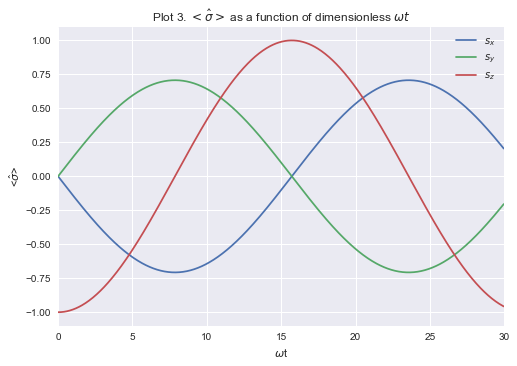

In [182]:
delta_t = 0.05 #time steps
wt_final = 30 #final time : wt = 30
wt = np.arange(0,wt_final,delta_t)
u = (np.array([1,1,0]).T/(2**(1/2)))
M = np.array([[0,-0.2*u[2],0.2*u[1]],[0.2*u[2],0,-0.2*u[0]],[-0.2*u[1],0.2*u[0],0]])
#initialising my bloch vector 
s = np.zeros((wt.size,3,1))

#s[0] = [np.dot(phi_0.T,np.dot(sigma_x,phi_0)),np.dot(phi_0.T,np.dot(sigma_x,phi_0)),np.dot(phi_0.T,np.dot(sigma_z,phi_0))]
s[0] = np.array([[0],[0],[-1]])

for i in range(1,600): 
    s[i] = (expm(M*(delta_t)))@s[i-1]    

    
plt.plot(wt,s[:,0],label = '$s_x$')
plt.plot(wt,s[:,1],label = '$s_y$')
plt.plot(wt,s[:,2],label = '$s_z$')
plt.xlim([0,30])
plt.legend()
plt.title('Plot 3. $<\hat{\sigma}>$ as a function of dimensionless $\omega t$')
plt.xlabel('$\omega$t')
plt.ylabel('<$\hat{\sigma}$>')




4. Consider a qubit with bare Hamiltonian
$$ \hat{H}_{\rm q} = \tfrac{1}{2}\hbar\omega_0 \hat{\sigma}_z,$$
that is driven by a time-dependent perturbation 
$$ \hat{H}_{\rm d}(t) = \hbar\Omega \sin(\omega_{\rm d} t)\hat{\sigma}_x.$$
Using linear-response theory, derive the change in the observables $\delta\langle \hat{\sigma}_x(t)\rangle$ and $\delta\langle \hat{\sigma}_z(t)\rangle$ assuming the initial state is $\lvert \psi(0)\rangle = \lvert \downarrow\rangle$. Plot the results as a function of time for $\Omega = 0.1\omega_0$ and $\omega_{\rm d} = 0.2\omega_0$. What happens when $\omega_{\rm d} = \omega_0$?

Text(0, 0.5, '$\\delta $<$\\hat{\\sigma}_x$(t)>')

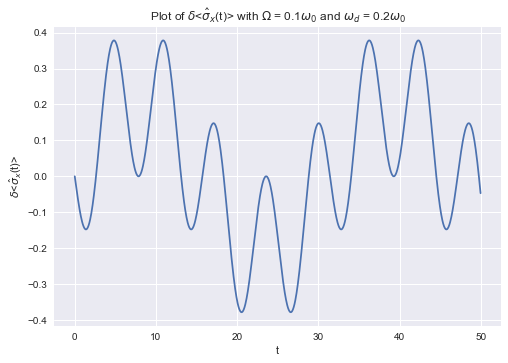

In [527]:
w_0 = 1
w_d = 0.2
Omega = 0.1
t = np.arange(0,50,0.05)
delta_x = (2*w_0*Omega)*(np.sin(w_d*t)-np.sin(w_0*t))/(w_0**2 - w_d**2)
plt.plot(t,delta_x)
plt.title('Plot of $\delta $<$\hat{\sigma}_x$(t)> with $\Omega$ = 0.1$\omega_0$ and $\omega_{d}$ = 0.2$\omega_0$')
plt.xlabel('t')
plt.ylabel('$\delta $<$\hat{\sigma}_x$(t)>')

Text(0, 0.5, '$\\delta $<$\\hat{\\sigma}_x$(t)>')

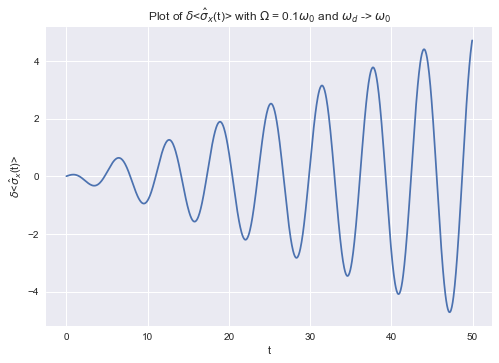

In [514]:
w_0 = 1
w_d = 0.999
Omega = 0.1
t = np.arange(0,50,0.05)
delta_x = ((2*w_0*Omega)/(w_0**2 - w_d**2))*(np.sin(w_0*t)-np.sin(w_d*t))
plt.plot(t,delta_x)
plt.title('Plot of $\delta $<$\hat{\sigma}_x$(t)> with $\Omega$ = 0.1$\omega_0$ and $\omega_{d}$ -> $\omega_0$')
plt.xlabel('t')
plt.ylabel('$\delta $<$\hat{\sigma}_x$(t)>')


When $\omega_{\rm d} = \omega_0$ ,the angular frequency of the driving field, tends towards w_0 and we tend to resonance where the population of the excited state undergoes
perfect sinusoidal Rabi oscillations at the Rabi frequency.  

5. A driven two-level system is described in the interaction picture by the Hamiltonian

    $$ \hat{H}_I = \frac{\hbar \Delta}{2}\hat{\sigma}_z + \frac{\hbar\Omega}{2} \left( \sin\varphi\hat{\sigma}_x - \cos\varphi \hat{\sigma}_y\right),$$

    where $\Delta$ is the detuning, $\Omega$ is the Rabi frequency, and $\varphi$ is the phase of the driving field. Write down this Hamiltonian as a matrix and derive analytical expressions for its eigenvalues and eigenvectors. Use these results to write down an expression for the state of the system in the interaction picture $|\psi_I(t)\rangle$, assuming that the initial state is $|\psi(0)\rangle = |\downarrow\rangle$. Derive the probability to find the system in the state $|\uparrow\rangle$ at time $t$. What is the probability to find the system in the state $|\downarrow\rangle$ at time $t$?

6. Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

    $$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$
    
    For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is
    
    $$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$
    
    where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that
    
    $$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$      
   
    Now specialise to a driven qubit with Hamiltonian
    
    $$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

    Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

In [594]:
#for this question i will work in a convenient unit system where i will choose w0 == 1
w_d = 0.99 #drive frequency
omega = 0.1 #rabi frequency

phi_0 = np.array([[0],[1]]) # initial state
delta_t = 0.05 #timestep
t_final = 100 # final time 
t = np.arange(0,t_final,delta_t)
expected0 = np.zeros((t.size,3))
sigma = np.array([[sigma_x],[sigma_y],[sigma_z]])

def hamiltonian1(omega,t):
    return (1/2)*sigma_z + omega*np.sin(w_d*t)*sigma_x

phi = phi_0
for i,n in enumerate(t):
    expected0[i] = np.array([(expectation(phi,sig,phi)) for sig in sigma])
    phi = np.dot(U(hamiltonian1(omega,n),delta_t),phi) 

<ipython-input-594-b4cd91e65e6d>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  expected0[i] = np.array([(expectation(phi,sig,phi)) for sig in sigma])


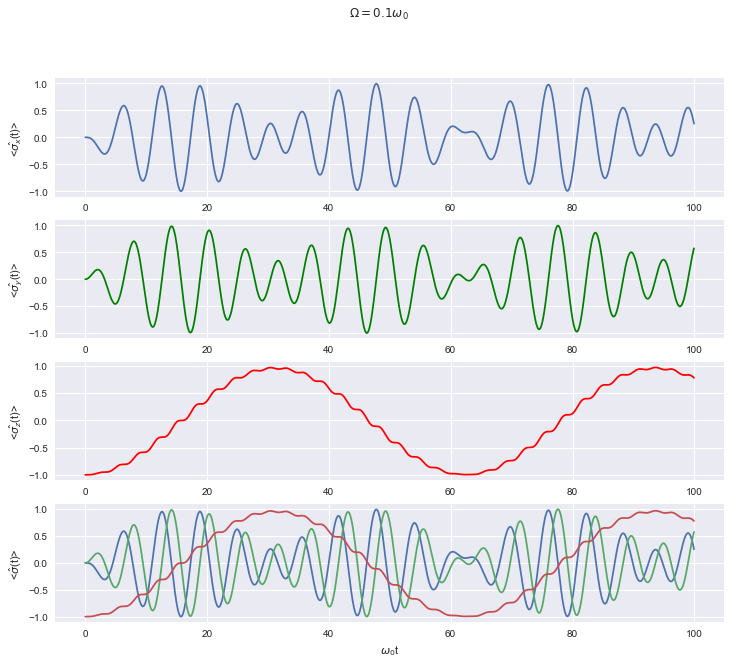

In [596]:
#Plotting

fig, ax = plt.subplots(4,1, figsize=(12,10))

fig.suptitle('$\Omega = 0.1\omega_0$')
ax[0].plot(t,expected0.T[0])
ax[0].set_ylabel('<$\hat{\sigma_x}$(t)>')
           
ax[1].plot(t,expected0.T[1],'g')
ax[1].set_ylabel('<$\hat{\sigma_y}$(t)>')

ax[2].plot(t,expected0.T[2],'r')
ax[2].set_ylabel('<$\hat{\sigma_z}$(t)>')

ax[3].plot(t,expected0.T[0])
ax[3].plot(t,expected0.T[1])
ax[3].plot(t,expected0.T[2])
ax[3].set_ylabel('<$\hat{\sigma}$(t)>')
ax[3].set_xlabel('$\omega_0$t')

plt.show()


In the plot above, for $\Omega$ = 0.1$\omega_0$it would be valid to use the Rotating wave approximation as we have that the frequency of the drive is large compared to all other energy scales, where we neglect the rapid oscillitary contributions as negligible over time and approximate to $$\hat{H}(t) = \tfrac{1}{2}\hbar \Delta \hat{\sigma}_z  + \tfrac{1}{2}\hbar \Omega( \sin(\omega_{\rm d}t)\hat{\sigma}_x - \cos(\omega_{\rm d}t)\hat{\sigma}_y).$$. However, in the second plot below we have that $\Omega = \omega_0$ which contradicts the assumption that $\omega_d$ is sufficiently large in comparison to the other variables to allow for these terms to be neglected. Hence, the Rotating Wave Approximation is not valid as we have that $\Omega$ > $\omega_d$.
In these plots compared to the RWA the smaller oscillations in sigmaz can be seen along the plot.

<ipython-input-184-e8a34d1be4dc>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  expected1[i] = np.array([(expectation(phi,sig,phi)) for sig in sigma])


Text(0.5, 0, '$\\omega_0$t')

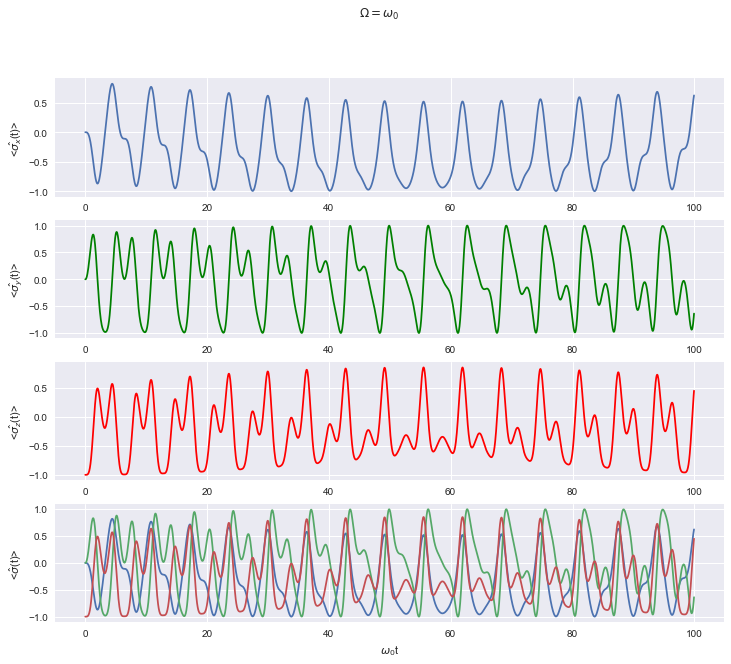

In [184]:
#now for omega = w_0
omega1 = 1
expected1 = np.zeros((t.size,3))
phi = phi_0

for i,n in enumerate(t):
    expected1[i] = np.array([(expectation(phi,sig,phi)) for sig in sigma])
    phi = np.dot(U(hamiltonian1(omega1,n),delta_t),phi) 

fig0, ax0 = plt.subplots(4,1, figsize=(12,10))

fig0.suptitle('$\Omega = \omega_0$')
ax0[0].plot(t,expected1.T[0])
ax0[0].set_ylabel('<$\hat{\sigma_x}$(t)>')
           
ax0[1].plot(t,expected1.T[1],'g')
ax0[1].set_ylabel('<$\hat{\sigma_y}$(t)>')

ax0[2].plot(t,expected1.T[2],'r')
ax0[2].set_ylabel('<$\hat{\sigma_z}$(t)>')

ax0[3].plot(t,expected1.T[0])
ax0[3].plot(t,expected1.T[1])
ax0[3].plot(t,expected1.T[2])
ax0[3].set_ylabel('<$\hat{\sigma}$(t)>')
ax0[3].set_xlabel('$\omega_0$t')


7. Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$
   
where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.
    
    
(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian is 
    
$$ \hat{H}_I = \hbar\begin{pmatrix}
		0 & 0 & \Omega_0/2 \\
		0 & 0 & \Omega_1/2\\
		\Omega_0/2 & \Omega_1/2 & \Delta
	\end{pmatrix} .$$
    
(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue.

(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

In [590]:
Omega_0 = Omega_1 = 1
delta1 = 10
delta2 = 1
delta_t = 0.5
Ot_final = 200
Ot = np.arange(0,Ot_final,delta_t)

def Hamiltonian4(Omega_0,Omega_1,delta):
    H = np.zeros((3,3))
    H[0,2] = H[2,0] = Omega_0/2
    H[1,2] = H[2,1] = Omega_1/2
    H[2,2] = delta
    return(H)

expected_11 = np.zeros((Ot.size),dtype = 'complex')
expected_21 = np.zeros((Ot.size),dtype = 'complex')
expected_12 = np.zeros((Ot.size),dtype = 'complex')
expected_22 = np.zeros((Ot.size),dtype = 'complex')

population11 = np.zeros((Ot.size))
population12 = np.zeros((Ot.size))
population21 = np.zeros((Ot.size))
population22 = np.zeros((Ot.size))


phi1 = np.array([1,0,0])
phi2 = np.array([1,0,0])

#Computing time evolution
for i in range(1,Ot.size):
    expected_11[i] = np.dot(np.array([0,1,0]),phi1)
    expected_12[i] = np.dot(np.array([0,0,1]),phi1)
    expected_21[i] = np.dot(np.array([0,1,0]),phi2)
    expected_22[i] = np.dot(np.array([0,0,1]),phi2)

    #populations = p = |<
    population11[i] = abs(expected_11[i])**2
    population21[i] = abs(expected_21[i])**2
    population12[i] = abs(expected_12[i])**2
    population22[i] = abs(expected_22[i])**2



    phi1 = U(Hamiltonian4(1,1,delta1),delta_t)@phi1
    phi2 = U(Hamiltonian4(1,1,delta2),delta_t)@phi2

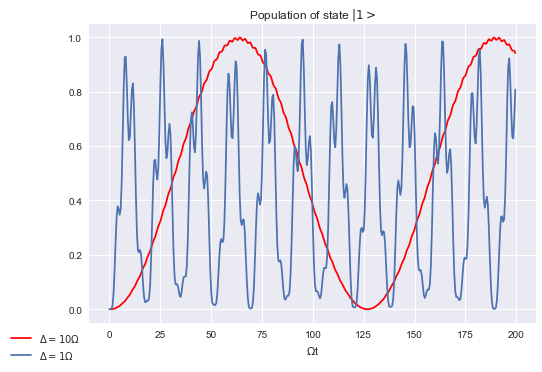

In [558]:
#plt.subplot(221)    
plt.plot(Ot,population11,'r',label = '$\Delta = 10\Omega$')
plt.plot(Ot,population21,label = '$\Delta = 1\Omega$')
plt.title('Population of state $|1>$')
plt.xlabel('$\Omega$t')
plt.ylabel('')
plt.legend(bbox_to_anchor=(0,0))

Text(0.5, 1.0, '$\\Delta = 10\\Omega$')

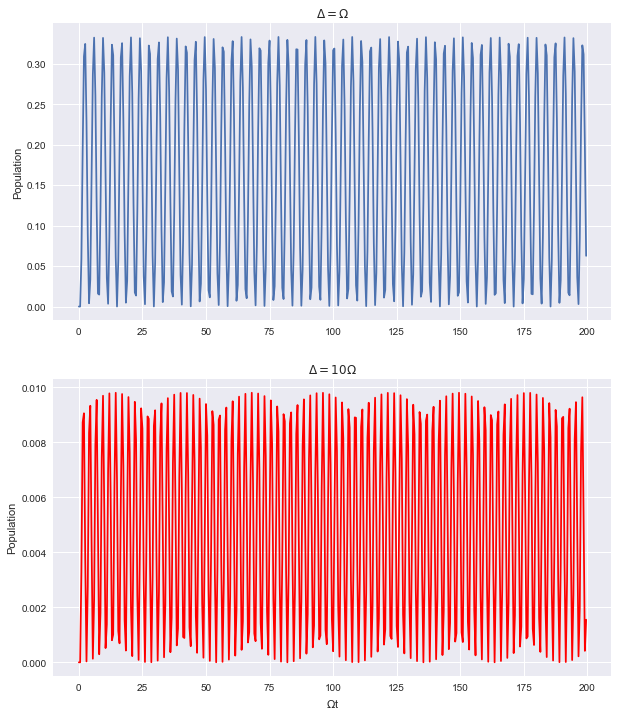

In [573]:
plt.figure(figsize=(22 ,12))
plt.subplot(221)
plt.plot(Ot,population22,label = '$\Delta = \Omega$')
plt.ylabel('Population')
plt.title('$\Delta = \Omega$')

plt.subplot(223)
plt.plot(Ot,population12,'r',label = '$\Delta = 10\Omega$')
plt.xlabel('$\Omega$t')
plt.ylabel('Population')
plt.title('$\Delta = 10\Omega$')

8. (a) Construct the two-qubit Hamiltonian matrix

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z$$

by combining single-qubit Pauli matrices with [tensor products](https://numpy.org/doc/stable/reference/generated/numpy.kron.html). Choose $\hbar\omega_A = 1$, $\hbar\omega_B = 0.5$, $\hbar J = 0.5$ and $\hbar V=0.1$. Print out the matrix explicitly and calculate its eigenvalues and eigenvectors. Calculate the overlap between the ground state and the state $|01\rangle = |0\rangle \otimes |1\rangle$. (The single-qubit states $|0\rangle$ and $|1\rangle$ are defined by $\hat{\sigma}_z|s\rangle = (-1)^s|s\rangle$ for $s=0,1$.)

In [464]:
#parameters
w_A = 1
w_B = 0.5
J = 0.5
V = 0.1
Id = np.eye(2)

#defining my hamiltonian
Hamiltonian2 = -(w_A/2)*(np.kron(sigma_z,Id))-(w_B/2)*np.kron(Id,sigma_z) + (J/4)*(np.kron(sigma_x,sigma_x)+np.kron(sigma_y,sigma_y)) + (V/2)*(np.kron(sigma_z,sigma_z))

#print out the matrix explicitly
print('Hamiltonian = ','\n',Hamiltonian2,'\n')
#calculate eigenvalues and eigenvectors 
eigstates=l.eig(Hamiltonian2)[1]
eigvals = l.eig(Hamiltonian2)[0]
print( 'Eigenstates =','\n',eigstates,'\n')
print( 'Eigenvalues =',eigvals,'\n')


o_one = np.kron(zero,one)
#groundstae with the minimum eigenvalue
GroundState = (eigstates[np.where(eigvals == eigvals.min())])
print('Overlap = ',np.dot(GroundState,o_one))


Hamiltonian =  
 [[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]] 

Eigenstates = 
 [[-0.        +0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [ 0.38268343-0.j  0.92387953+0.j  0.        +0.j  0.        +0.j]
 [ 0.92387953+0.j -0.38268343+0.j  0.        +0.j  0.        +0.j]
 [-0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j]] 

Eigenvalues = [ 0.30355339+0.j -0.40355339+0.j -0.7       +0.j  0.8       +0.j] 

Overlap =  [[-0.38268343+0.j]]


(b) Calculate the expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ as a function of time in the interval $t \in [0,10]$ starting from the state $|\psi(0)\rangle = |10\rangle$. (For example, by discretising time into small steps $\Delta t$, as in previous exercises.) Repeat this exercise for the initial state $|\psi(0)\rangle = |+\rangle\otimes |0\rangle$, where $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$. Plot both results and give a couple of sentences to explain their physical meaning.

In [465]:
#tensor
A = np.kron(sigma_z,Id)
#initial state
zero = np.array([[1],[0]])
one = np.array([[0],[1]])
plus = (zero+one)/np.sqrt(2)

#discretising time into small steps delta_t
t_final = 10
delta_t = 0.05
t = np.arange(0,t_final,delta_t)

For $|\psi(0)\rangle = |10\rangle$

In [466]:
#applying method to calculate expectation as seen above
phi = np.kron(one,zero)
expected2 = np.zeros((t.size),dtype = 'complex')

for n in range(t.size):
    expected2[n] = np.array(expectation(phi,A,phi))
    phi = np.dot(U(Hamiltonian2,0.05),phi) 
    

For $|\psi(0)\rangle = |+\rangle\otimes |0\rangle$ , $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$

In [467]:
phi = np.kron(plus,zero)
expected3 = np.zeros((t.size),dtype = 'complex')

for n in range(t.size):
    expected3[n] = np.array(expectation(phi,A,phi))
    phi = np.dot(U(Hamiltonian2,0.05),phi) 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 10.0)

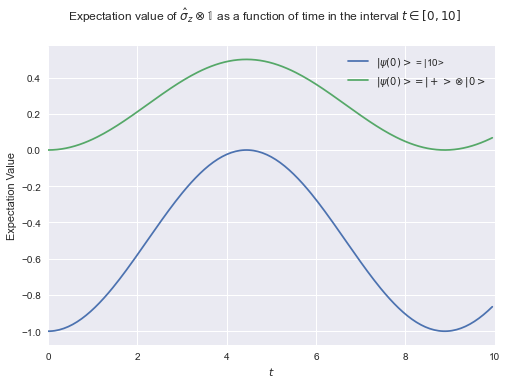

In [468]:
plt.suptitle('Expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ as a function of time in the interval $t \in [0,10]$')
plt.plot(t,expected2,label = '$|\psi(0)>$ = |10>')
plt.plot(t,expected3,label = '$|\psi(0)> = |+>\otimes |0>$')
plt.legend()
plt.ylabel('Expectation Value')
plt.xlabel('$t$')
plt.xlim([0,10])


For this question, the use of the qubits is as energy levels for a single atom.
The states $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$ are similar lower energy states , whereas  $|\psi(0)\rangle = |10\rangle$ is another state with higher energy.. These are the elementary qubits for quantum information processing. Each of the eigenstates corresponds to a wavefunction,  which is the probability amplitude for the electron to be found at a specific position wrt the nucleus.

(c) Let's try to generalise this to multi-qubit systems. As a first step, define a list whose first element is 

$$ \hat{\sigma}^{z}_A = \hat{\sigma}_{z}\otimes \hat{\mathbb{1}},$$

and whose second element is

$$ \hat{\sigma}^{z}_B = \hat{\mathbb{1}}\otimes\hat{\sigma}_{z}.$$

Define analogous lists for the operators $\hat{\sigma}^x_{A,B}$ and $\sigma^y_{A,B}$. This extends the single-qubit Pauli matrices to operators acting on the two-qubit Hilbert space. Use these operators and their products to construct the Hamiltonian from part (a). 

In [239]:
sigma_zAB = [np.kron(sigma_z,Id),np.kron(Id,sigma_z)]
sigma_xAB = [np.kron(sigma_x,Id),np.kron(Id,sigma_x)]
sigma_yAB = [np.kron(sigma_y,Id),np.kron(Id,sigma_y)]

In [243]:
Hamiltonian2 = (-(w_A/2)*(sigma_zAB[0])-
                (w_B/2)*(sigma_zAB[1]) +
                (J/4)*((sigma_xAB[0])@(sigma_xAB[1])+(sigma_yAB[0])@(sigma_yAB[1])) 
                + (V/2)*(sigma_zAB[0]@sigma_zAB[1]))
print('Hamiltonian =' ,'\n',Hamiltonian2)

Hamiltonian = 
 [[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]]


(d) Now extend this construction to a four-qubit system. More precisely, define three lists (one for each Pauli matrix) of four elements each. Each element will be an operator on the four-qubit Hilbert space, e.g. the first element of one of the lists could be $\hat{\sigma}_x$ for qubit 1, the second element will be $\hat{\sigma}_x$ for qubit 2, etc.

Now generalise this to $L$ qubits. Write a function that takes an integer $L$ as input, and outputs three lists of Pauli operators extended to the $L$-qubit Hilbert space.

In [469]:
def Id(n):
    return np.eye((2**(n)),dtype = 'complex')

def L_qubitHspace(L):
    
    '''This function takes an integer L as input,and outputs 
    three lists of Pauli operators extended to the L-qubit Hilbert space'''
    
    sigma_AB = np.zeros((3,L,2**L,2**L),dtype = 'complex')
    for l in range(L):
        for i in range(3):
            sigma_AB[i,l] = np.kron(Id(l),np.kron(sigma[i],Id(L-l-1)))
    return list(sigma_AB[0]) , list(sigma_AB[1]),list(sigma_AB[2])


In [309]:
#defining my three seperate lists for my paulis in the four-qubit Hilbert space
pauli_xAB,pauli_yAB ,pauli_zAB = L_qubitHspace(4)

(e) The $L$-qubit generalisation of the Hamiltonian from (a) reads as

$$ \hat{H}  = -\sum_{j=1}^L\frac{\hbar\omega_j}{2}\hat{\sigma}_j^z +  \sum_{j=1}^{L-1}\left[\frac{\hbar J}{4} \left ( \hat{\sigma}^x_j  \hat{\sigma}^x_{j+1} + \hat{\sigma}^y_{j} \hat{\sigma}^y_{j+1} \right  ) + \frac{\hbar V}{2}  \hat{\sigma}^z_j \hat{\sigma}^z_{j+1}\right].$$

Construct this Hamiltonian for $L=5$ qubits, with equal local energies $\omega_j = \omega_0$ for all qubits, $ J = \tfrac{1}{2}\omega_0$ and $V = 0$. Compute and plot the time evolution of $\langle \hat{\sigma}^z_1\rangle$ starting from an initial state $|\psi(0)\rangle = |10000\rangle$ up to a time $Jt = 30$. Repeat the calculation for $L=6,7,8,9$ qubits with a similar initial state (i.e. $|\psi(0)\rangle = |100\cdots 00\rangle$). Explore the effect of switching on a finite interaction strength $V$. Briefly discuss (max. one paragraph) the features that you see and the differences between these various examples. 

In [578]:
#I will operate here in omega_0 = 1 again 
def Hamiltonian(L,J,V):
    sig_x , sig_y , sig_z = L_qubitHspace(L)
    
    H1 = (-1/2)*np.sum(sig_z,axis = 0)

    Hd = [((J/4)*(sig_x[j]@sig_x[j+1] + sig_y[j]@sig_y[j+1]) 
           + (V/2)*sig_z[j]@sig_z[j+1]) for j in range(L-1)]
    Hd = np.sum(Hd,axis = 0)
    return (H1+Hd) , sig_z

#defining a function for my initial state
def phi_0(L):
    phi = one
    for i in range(L-1):
        phi = np.kron(phi,zero)
    return phi    

In [580]:
def L_expected(Jt_final,delta_t,L,J,V):
    
    '''This function takes in as inputs the final time, the time step size, 
    the dimension of our L_qubit Hilbert Space, J and interaction strength V and 
    returns a plot of the expected values of sigmaz_1, availing of first the function 
    written to define an initial state phi_0 = |100..000> and then the function writing 
    the L-qubit generalisation of the Hamiltonian'''
    
    Jt = np.arange(0,Jt_final,delta_t)

    phi = phi_0(L)
    Hamiltonian3 , sig_z = Hamiltonian(L,J,V)
    expected4 = np.zeros(Jt.size)

    for n in range(Jt.size):
        expected[n] = np.array(expectation(phi,sig_z[0],phi))
        phi = np.dot(U(Hamiltonian3,delta_t),phi)
    return expected



Note: Here my laptop started to fail, I have a new one on the way but the one I have could only handle plotting these seperately and my L = 9 expected values had to be run step by step, sorry about that.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Jt')

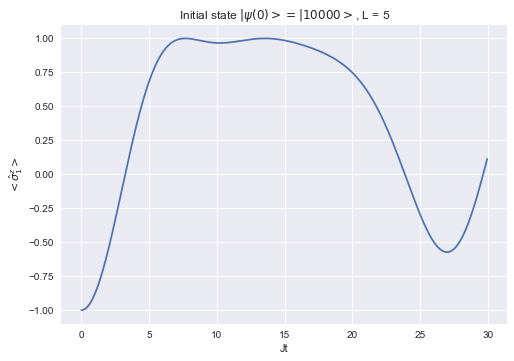

In [448]:
expected_5 = L_expected(30,0.05,5,0.5,0)
plt.plot(Jt,expected_5)
plt.title('Initial state $|\psi(0)> = |10000>$, L = 5')
plt.ylabel('$<\hat{\sigma}^z_1>$')
plt.xlabel('Jt')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Jt')

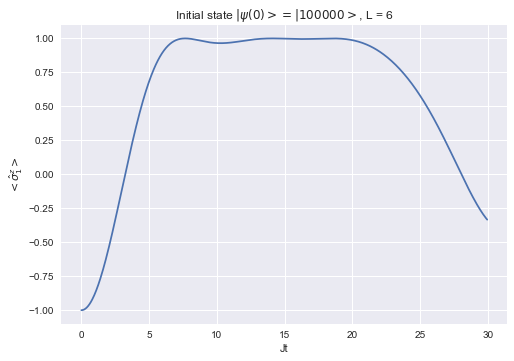

In [449]:
expected_6 = L_expected(30,0.05,6,0.5,0)
plt.plot(Jt,expected_6)
plt.title('Initial state $|\psi(0)> = |100000>$, L = 6')
plt.ylabel('$<\hat{\sigma}^z_1>$')
plt.xlabel('Jt')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Jt')

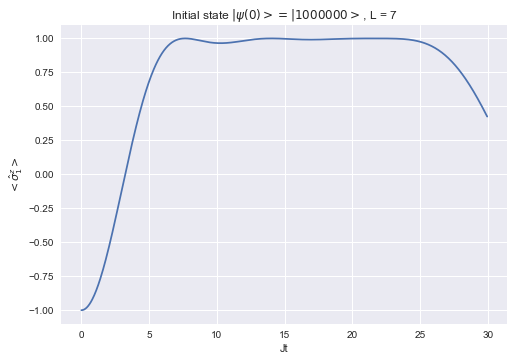

In [450]:
expected_7 = L_expected(30,0.05,7,0.5,0)
plt.plot(Jt,expected_7)
plt.title('Initial state $|\psi(0)> = |1000000>$, L = 7')
plt.ylabel('$<\hat{\sigma}^z_1>$')
plt.xlabel('Jt')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Jt')

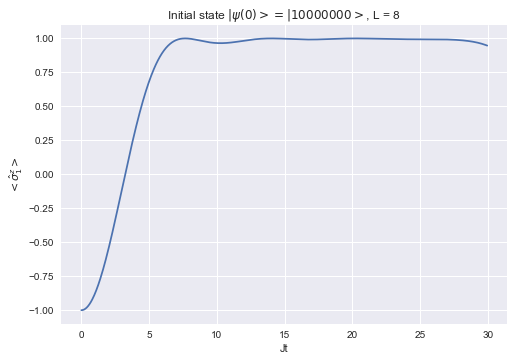

In [451]:
expected_8 = L_expected(30,0.05,8,0.5,0)
plt.plot(Jt,expected_8)
plt.title('Initial state $|\psi(0)> = |10000000>$, L = 8')
plt.ylabel('$<\hat{\sigma}^z_1>$')
plt.xlabel('Jt')

In [472]:
phi = phi_0(9)

In [473]:
Hamiltonian3 , sig_z9 = Hamiltonian(9,0.5,0)

In [474]:
expected9 = np.zeros(Jt.size,dtype = 'complex')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Jt')

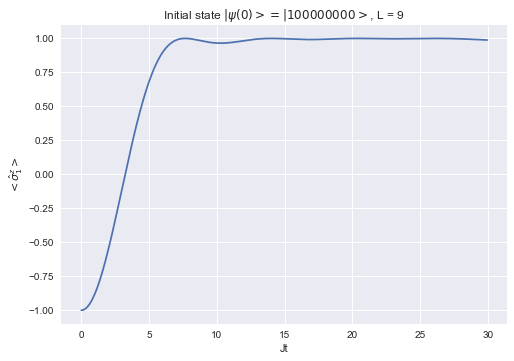

In [475]:
for n in range(Jt.size):
    expected9[n] = np.array(expectation(phi,sig_z9[0],phi))
    phi = np.dot(U(Hamiltonian3,delta_t),phi)
plt.plot(Jt,expected9)
plt.title('Initial state $|\psi(0)> = |100000000>$, L = 9')
plt.ylabel('$<\hat{\sigma}^z_1>$')
plt.xlabel('Jt')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


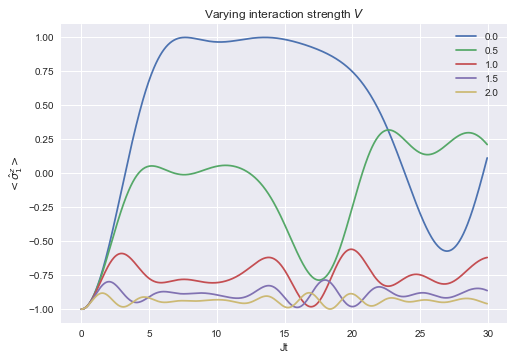

In [589]:
Vs = np.array([0,0.5,1,1.5,2])

for v in Vs:
    plt.plot(Jt,L_expected(30,0.05,5,0.5,v),label = v)
plt.title('Varying interaction strength $V$')
plt.ylabel('$<\hat{\sigma}^z_1>$')
plt.xlabel('Jt')
plt.legend()

In the plots of $<\hat{\sigma}^z_1>$ in terms of changing L, increasing the dimension of the qubit hilbert space prevents the drop back in size of $<\hat{\sigma}^z_1>$. The plots for L = 5,6,7,8,9 match before reaching $<\hat{\sigma}^z_1>$ = 1, staying at 1 for length of time proportional to L (smaller L smaller amount of time spent at 1) and then starting dropping back down again.

As seen in the plot above, increasing the interaction strength decreases the amplitude and variance of $<\hat{\sigma}^z_1>$